In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import sklearn

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.Dataset.unique()

array([1, 2], dtype=int64)

In [4]:
data.shape

(466, 11)

In [5]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

## removing null 

In [6]:
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [7]:
import seaborn as sns

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

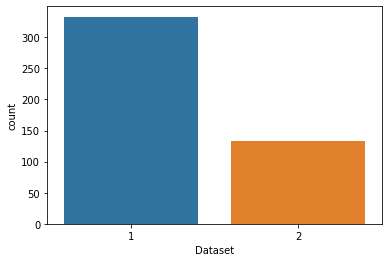

In [9]:
sns.countplot(label='count',x='Dataset',data=data)

## More Dataset 1 count 

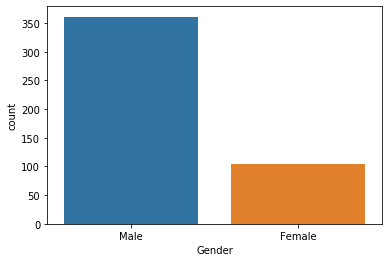

In [10]:
sns.countplot(label='Count',x='Gender',data=data)

# there is a similarity between gender and dataset counts 

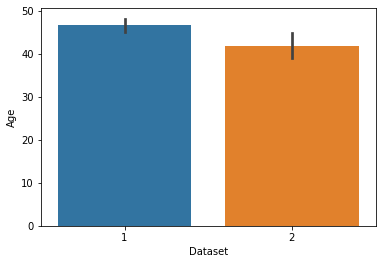

In [11]:
sns.barplot(x='Dataset',y='Age',data=data)

## Higher Age group belong to Dataset 1 

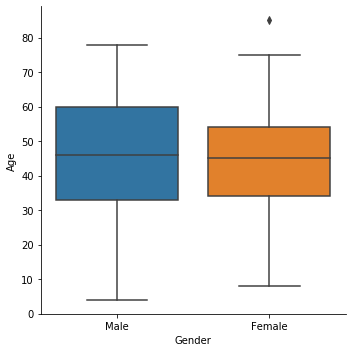

In [12]:
sns.catplot(x="Gender", y="Age", kind="box",data=data)

In [13]:
data[(data.Gender=='Female') & (data.Age>80)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
380,85,Female,1.0,0.3,208,17,15,7.0,3.6,1.0,2


In [14]:
# Removing outliers 

In [15]:
#data.drop(data.index[380],inplace = True)

# Visualizing 

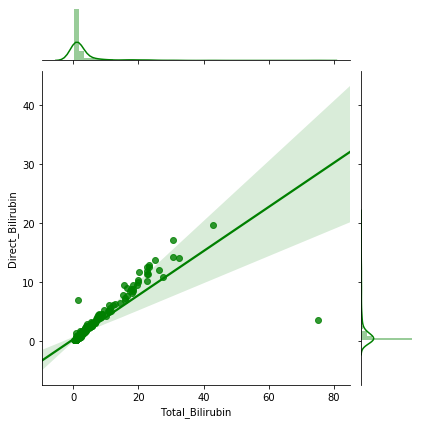

In [16]:
sns.jointplot("Total_Bilirubin", "Direct_Bilirubin", data=data, kind='reg', color="g")

## "Total_Bilirubin", "Direct_Bilirubin" are (approx) proportional 

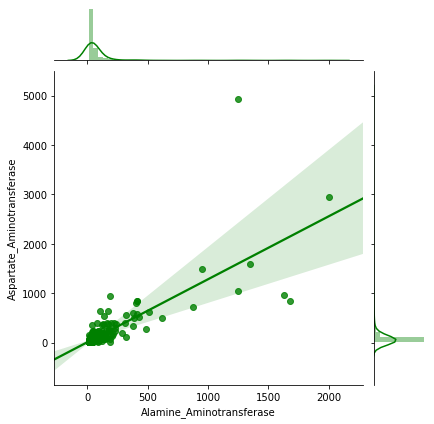

In [17]:
sns.jointplot("Alamine_Aminotransferase", "Aspartate_Aminotransferase", data=data, kind='reg', color="g")

##  "Alamine_Aminotransferase", "Aspartate_Aminotransferase" are (approx) proportional

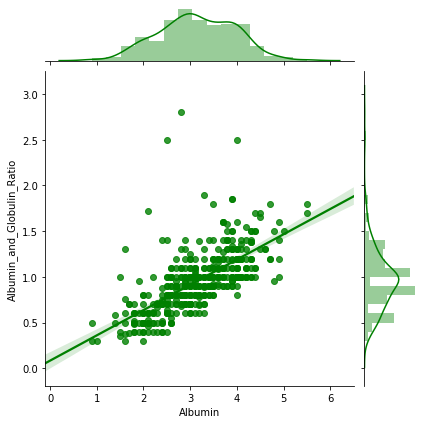

In [18]:
sns.jointplot("Albumin", "Albumin_and_Globulin_Ratio", data=data, kind='reg', color="g")

## "Albumin", "Albumin_and_Globulin_Ratio" are (approx) proportional 

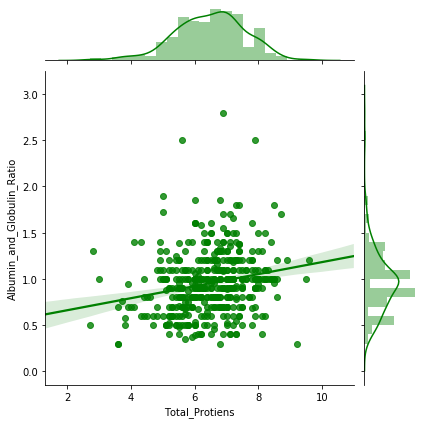

In [19]:
sns.jointplot("Total_Protiens" ,"Albumin_and_Globulin_Ratio", data=data, kind='reg', color="g")

## Can't see any relation 

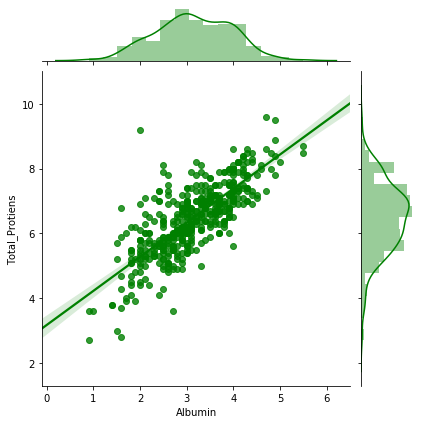

In [20]:
sns.jointplot("Albumin" ,"Total_Protiens", data=data, kind='reg', color="g")

## "Albumin" ,"Total_Protiens" are approx proportional

### Coverting Gender To Numeric Value

In [21]:
data1 = pd.concat([data,pd.get_dummies(data['Gender'], prefix = 'Gender')], axis=1)

## On the basis of above graph we can select the useful columns 

### Dropping Direct_Bilirubin and Aspartate_Aminotransferase

In [22]:
feature_cols = ['Age', 'Total_Bilirubin', 
                'Alamine_Aminotransferase', 'Total_Protiens', 'Albumin', 
                'Albumin_and_Globulin_Ratio']

###  Preparing X and y

In [23]:
X = data1[feature_cols]
y = data.Dataset

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

# Applying Logistic Regression 

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
LR = LogisticRegression()
LR = LR.fit(X_train,y_train)

c:\users\visha\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(LR.predict(X_test),y_test)

0.7521367521367521

# Applying Decision Tree

In [29]:
from sklearn import tree
dd1 = tree.DecisionTreeClassifier()
dd1 = dd1.fit(X_train, y_train)

In [30]:
accuracy_score(dd1.predict(X_test),y_test)

0.6410256410256411

# Applying SVM

In [31]:
from sklearn import svm
svm1 = svm.SVC(gamma='auto')
svm1 = svm1.fit(X_train, y_train)

In [32]:
accuracy_score(svm1.predict(X_test),y_test)

0.7264957264957265

# Applying Random Forest Tree 

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=100)
rf1 = rf1.fit(X_train, y_train)

In [34]:
accuracy_score(rf1.predict(X_test),y_test)

0.6752136752136753

# Applying K Neighbor

In [35]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh = neigh.fit(X_train, y_train)

In [36]:
accuracy_score(neigh.predict(X_test), y_test)

0.6324786324786325

# From the above Algos we chose SVM 

In [37]:
test_data = pd.read_csv('test.csv')

In [38]:
test_data = pd.concat([test_data,pd.get_dummies(data['Gender'], prefix = 'Gender')], axis=1)

In [39]:
test_data = test_data.loc[:116]

In [40]:
test_data = test_data.fillna(0)

In [41]:
X_final = test_data[feature_cols]

In [42]:
y_final = svm1.predict(X_final)

In [43]:
test_data['Predicted_Dataset'] = y_final

In [44]:
test_data['Predicted_Dataset'].value_counts()

1    110
2      7
Name: Predicted_Dataset, dtype: int64

In [45]:
test_data.to_csv('output.csv',index = False,sep=",")